# 1. Data Loading and Previewing

In [141]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
from sklearn import preprocessing
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

scaler = preprocessing.MinMaxScaler()
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()
df.dropna()
df = df[df['TotalCharges'] != ' ']
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['tenure'] = df['tenure'].astype(float)

df['tenure'] = scaler.fit_transform(df['tenure'].values.reshape(-1,1))
df['MonthlyCharges'] = scaler.fit_transform(df['MonthlyCharges'].values.reshape(-1,1))
df['TotalCharges'] = scaler.fit_transform(df['TotalCharges'].values.reshape(-1,1))


custinfos = df.loc[:,['gender', 'SeniorCitizen', 'Partner', 'tenure', 'Dependents']]
product_info = df.loc[:,['MonthlyCharges', 'TotalCharges', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,0.000000,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No
1,5575-GNVDE,Male,0,No,No,0.464789,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,No
2,3668-QPYBK,Male,0,No,No,0.014085,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes
3,7795-CFOCW,Male,0,No,No,0.619718,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,No
4,9237-HQITU,Female,0,No,No,0.014085,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,Yes


# 2. Clustering of Customers

In [142]:
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=2)
clusters = kproto.fit_predict(custinfos.values, categorical=[0, 1, 2, 4])

# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)
# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)

categories = kproto.predict(custinfos.values, categorical=[0, 1, 2, 4])
df['category'] = categories
mergetable = pd.merge(df, custinfos, how='inner')

groups = df.groupby(['category'])
customerdf = pd.DataFrame(groups.category.count())
customerdf['proportion'] = customerdf['category'].values / np.sum(customerdf['category'].values)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 891, ncost: 1455.5195852221937
Run: 1, iteration: 2/100, moves: 350, ncost: 1448.571181902979
Run: 1, iteration: 3/100, moves: 106, ncost: 1446.9602393168657
Run: 1, iteration: 4/100, moves: 22, ncost: 1446.8511505901006
Run: 1, iteration: 5/100, moves: 22, ncost: 1446.8080947811693
Run: 1, iteration: 6/100, moves: 0, ncost: 1446.8080947811693
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 621, ncost: 1348.3407838464718
Run: 2, iteration: 2/100, moves: 129, ncost: 1346.906839899235
Run: 2, iteration: 3/100, moves: 27, ncost: 1346.8045041305752
Run: 2, iteration: 4/100, moves: 0, ncost: 1346.8045041305752
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1900, ncost: 1380.0498934033133
Run: 3, iteration: 2/100, moves: 528, ncost: 1343.5567505065203


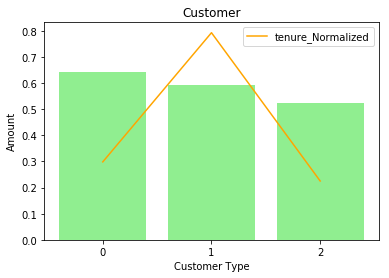

,tenure_Normalized,gender,SeniorCitizen,Partner,Dependents
0,0.298244,Male,0,No,No
1,0.792575,Female,0,Yes,Yes
2,0.225057,Female,0,No,No


In [143]:
cust_clustering = pd.DataFrame(columns=['tenure_Normalized', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'])
cust_clustering['tenure_Normalized'] = kproto.cluster_centroids_[0][:,0]
#cust_clustering['Total Charges'] = kproto.cluster_centroids_[0][:,1]
for i in range(0, len(cust_clustering.columns) - 1):
    cust_clustering.iloc[:,i + 1] = kproto.cluster_centroids_[1][:,i]

centers = kproto.cluster_centroids_
#dim1 = centers[0][:,0]
#dim2 = centers[0][:,1]
plt.bar(list(range(3)), customerdf['category'].values / 4000, color='lightgreen')
plt.xticks([0, 1, 2])
plt.xlabel('Customer Type')
plt.ylabel('Amount')
plt.title('Customer')
plt.plot([0, 1, 2], cust_clustering['tenure_Normalized'].values, label='tenure_Normalized', color='orange')
plt.legend()
plt.show()

cust_clustering

C:\ProgramData\Anaconda3\lib\site-packages\minisom.py:296: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


Training...
 [ 6000 / 6000 ] 100% 0.00679 it/s
...ready!


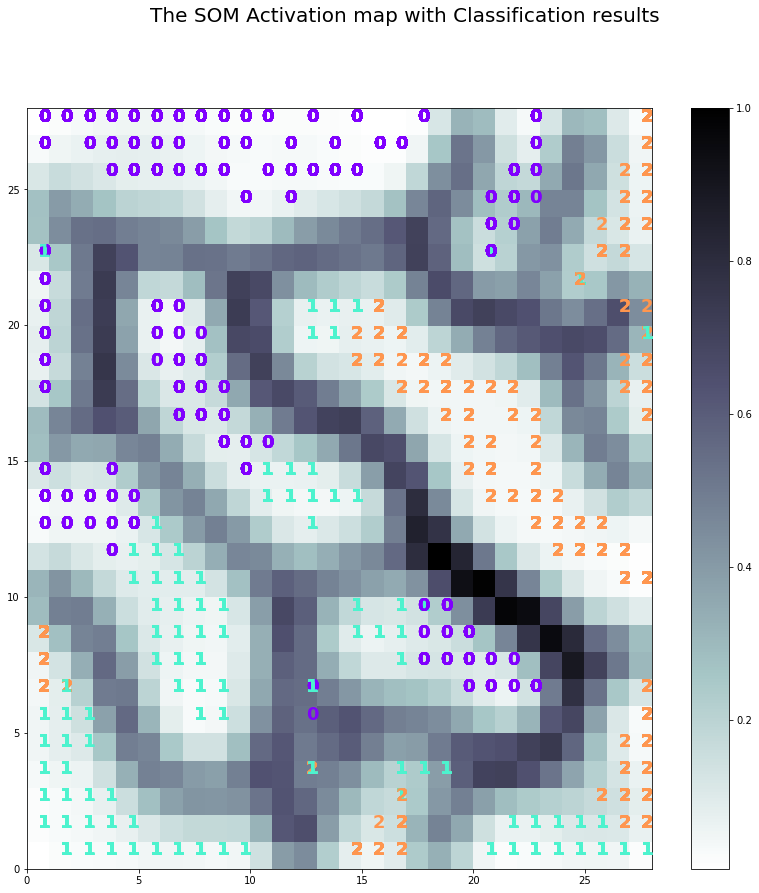

In [144]:
dummies = pd.get_dummies(custinfos)
dummies.head()
som = MiniSom(28, 28, 9, sigma=2.5, learning_rate=0.5, neighborhood_function='gaussian', random_seed=10)
som.pca_weights_init(dummies.values)
print("Training...")
som.train_batch(dummies.values, 6000, verbose=True)  # random training
print("\n...ready!")
labels = df['category'].values
samples = dummies.values
fig = plt.figure(figsize=(14, 14))
fig.suptitle('The SOM Activation map with Classification results', fontsize=20)
# Plotting the response for each pattern in the dataset
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
wmap = {}
im = 0

for x, t in zip(samples, labels):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 2.5), fontdict={'weight': 'bold',  'size': 18})
    im = im + 1

plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.colorbar()
plt.show()

# 3. Clustering of the Products

In [145]:
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=2)
clusters = kproto.fit_predict(product_info.values, categorical=list(range(2,len(product_info.columns))))
print('kproto (Huang) centroids:')
print(kproto.cluster_centroids_)
df['product_type'] = clusters


groups = df.groupby(['product_type'])
productdf = pd.DataFrame(groups.product_type.count())
productdf['proportion'] = productdf['product_type'].values / np.sum(productdf['product_type'].values)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 787, ncost: 3863.3961958632035
Run: 1, iteration: 2/100, moves: 333, ncost: 3859.81407868735
Run: 1, iteration: 3/100, moves: 21, ncost: 3859.797163352644
Run: 1, iteration: 4/100, moves: 0, ncost: 3859.797163352644
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 927, ncost: 3862.894638701214
Run: 2, iteration: 2/100, moves: 367, ncost: 3858.084950978422
Run: 2, iteration: 3/100, moves: 18, ncost: 3858.0776983971286
Run: 2, iteration: 4/100, moves: 0, ncost: 3858.0776983971286
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 610, ncost: 3861.6511376363933
Run: 3, iteration: 2/100, moves: 261, ncost: 3859.8042312759567
Run: 3, iteration: 3/100, moves: 14, ncost: 3859.797163352645
Run: 3, iteration: 4/100, moves: 0, ncost: 3859.797163352645
Init: ini

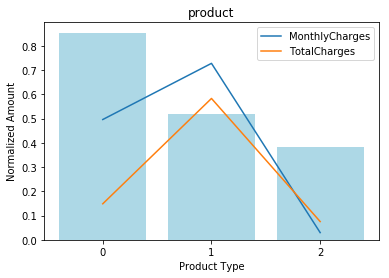

,Monthly Charges,Total Charges,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.496183,0.148594,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
1,0.727857,0.583073,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
2,0.029636,0.075218,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [146]:
product_clustering = pd.DataFrame(columns=['Monthly Charges', 'Total Charges', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
product_clustering['Monthly Charges'] = kproto.cluster_centroids_[0][:,0]
product_clustering['Total Charges'] = kproto.cluster_centroids_[0][:,1]
for i in range(0, len(product_clustering.columns) - 2):
    product_clustering.iloc[:,i + 2] = kproto.cluster_centroids_[1][:,i]

plt.bar(list(range(3)), productdf['product_type'].values / 4000, color='lightblue')
plt.plot(list(range(3)), product_clustering['Monthly Charges'], label='MonthlyCharges')
plt.plot(list(range(3)), product_clustering['Total Charges'], label='TotalCharges')
plt.xticks([0, 1, 2])
plt.xlabel('Product Type')
plt.ylabel('Normalized Amount')
plt.legend()
plt.title('product')
plt.show()

product_clustering

C:\ProgramData\Anaconda3\lib\site-packages\minisom.py:296: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


Training...
 [ 6000 / 6000 ] 100% 0.00687 it/s
...ready!


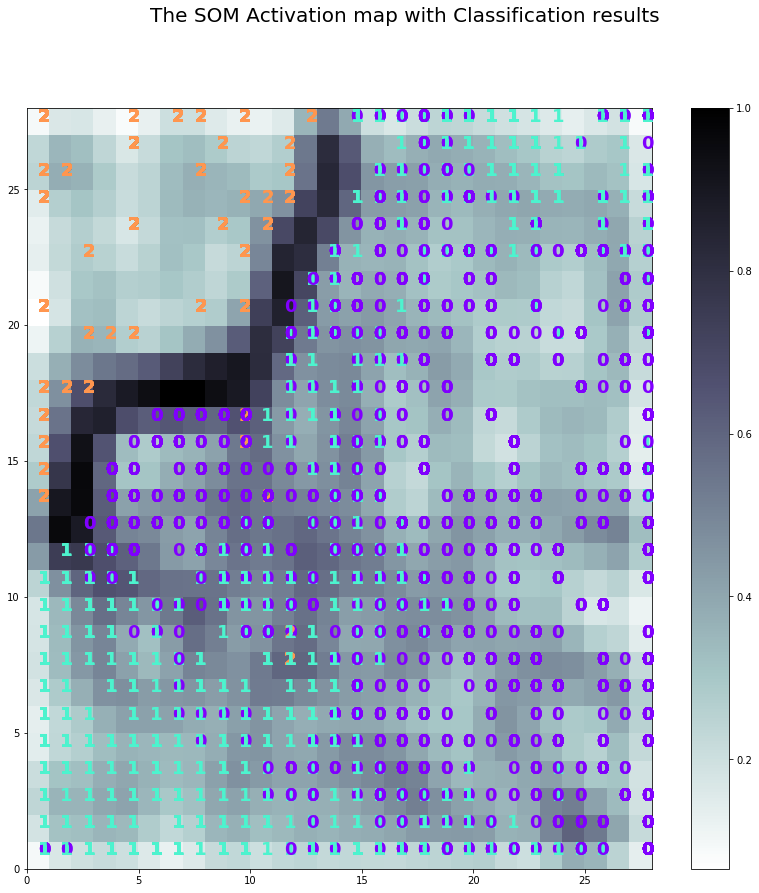

In [147]:
dummies = pd.get_dummies(product_info)
dummies.head()
som = MiniSom(28, 28, 37, sigma=2.5, learning_rate=0.5, neighborhood_function='gaussian', random_seed=10)
som.pca_weights_init(dummies.values)
print("Training...")
som.train_batch(dummies.values, 6000, verbose=True)  # random training
print("\n...ready!")
labels = df['product_type'].values
samples = dummies.values
labels = labels
fig = plt.figure(figsize=(14, 14))
fig.suptitle('The SOM Activation map with Classification results', fontsize=20)
# Plotting the response for each pattern in the dataset
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
wmap = {}
im = 0

for x, t in zip(samples, labels):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 2.5), fontdict={'weight': 'bold',  'size': 18})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.colorbar()
plt.show()

# 4. Building the Matching From Customers to Products

In [148]:
groups = df.groupby(['category', 'product_type'])
result = pd.DataFrame(groups.customerID.count())
result = result.rename(columns={'customerID':'count'})
#result['proportion'] = result['count'].values / np.sum(result['count'].values)
result

count
category product_type       
0        0              1567
         1               428
         2               572
1        0               446
         1              1387
         2               531
2        0              1404
         1               268
         2               429